### **In this section, we import all the necessary libraries and dependencies to process the data, build machine learning models, and visualize the results. Key libraries include NumPy, Pandas, Keras (for machine learning), and Plotly/Seaborn (for data visualization).**

In [20]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

### **We load the Chicago Taxi dataset, which contains trip information, fares, and payment types. This dataset will be used to build a predictive model for fare estimation.**

In [21]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

### **We select only the relevant columns from the dataset to simplify analysis. These columns include trip mileage, trip time, fare, company, payment type, and tip rate.**

In [22]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


### **Here we display basic statistics about the dataset, including the total number of rows, mean values, and other key statistics. This helps us understand the data better and identify any issues such as missing values.**

In [23]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


### **We answer a set of key questions about the dataset based on the summary statistics. These insights help guide our understanding of the data, including max fare, mean trip distance, and the most frequent payment types.**

In [24]:
#@title Double-click or run to view answers about dataset statistics

answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? \t\t\t\tAnswer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? \t\tAnswer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? \t\tAnswer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? \t\tAnswer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")


What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


### **The correlation matrix helps us understand how features in the dataset are related to one another, especially to the target variable FARE. This is useful for identifying which features may be important for predictive modeling.**

In [25]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


from matplotlib import pyplot as plt
_df_0['TRIP_MILES'].plot(kind='hist', bins=20, title='TRIP_MILES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TRIP_SECONDS'].plot(kind='hist', bins=20, title='TRIP_SECONDS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FARE'].plot(kind='hist', bins=20, title='FARE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TIP_RATE'].plot(kind='hist', bins=20, title='TIP_RATE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TRIP_MILES', y='TRIP_SECONDS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TRIP_SECONDS', y='FARE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FARE', y='TIP_RATE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TRIP_MILES'].plot(kind='line', figsize=(8, 4), title='TRIP_MILES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['TRIP_SECONDS'].plot(kind='line', figsize=(8, 4), title='TRIP_SECONDS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['FARE'].plot(kind='line', figsize=(8, 4), title='FARE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['TIP_RATE'].plot(kind='line', figsize=(8, 4), title='TIP_RATE')
plt.gca().spines[['top', 'right']].set_visible(False)

### **Based on the correlation matrix, we conclude that TRIP_MILES is the most correlated feature with FARE, while TIP_RATE has the weakest correlation. This guides our feature selection for the predictive model.**

In [26]:
#@title Double-click to view answers about the correlation matrix

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


### **The pairplot helps us visualize the relationships between different variables in the dataset. By examining the scatter plots, we can identify potential patterns or trends that might be useful for our model.**

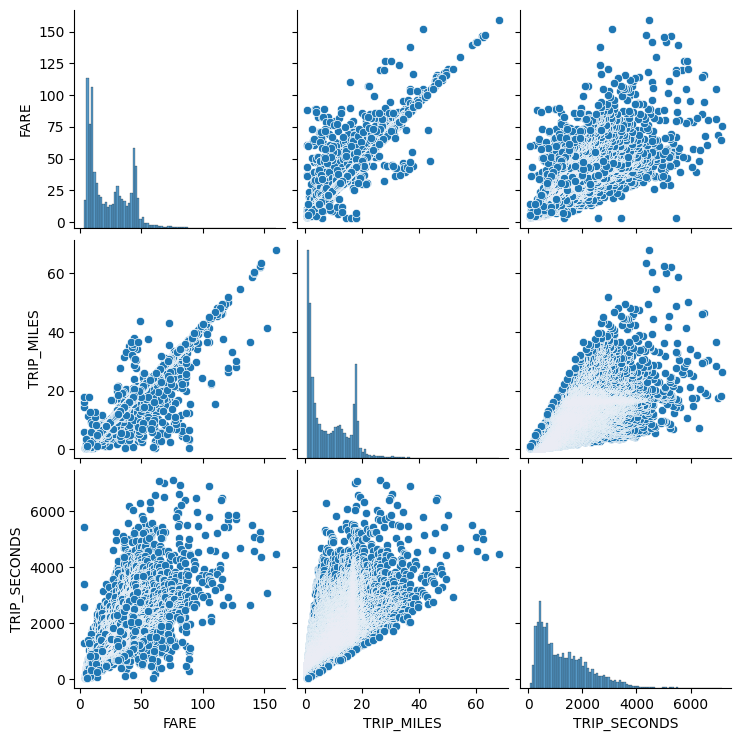

In [27]:
#@title Code - View pairplot
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

### **We define a set of plotting functions to visualize the training process, the model fit, and the loss curve. These will be used later to evaluate the performance of the machine learning model.**

In [28]:
#@title Define plotting functions

def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


### **These functions are responsible for creating, training, and running experiments with a linear regression model. We use Keras to build the model and train it using the given hyperparameters such as learning rate, epochs, and batch size.**

In [29]:
#@title Code - Define ML functions

def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Most simple keras models are sequential.
  model = keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(keras.layers.Dense(units=1,
                                  input_shape=(num_features,)))

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


### **In this step, we run an experiment with TRIP_MILES as the feature and FARE as the target label. We specify hyperparameters for training and observe how the model performs with a single feature.**

In [30]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 291.8432 - root_mean_squared_error: 17.0572
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 104.6767 - root_mean_squared_error: 10.1928
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.1465 - root_mean_squared_error: 5.0040
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.3004 - root_mean_squared_error: 4.2723
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.4868 - root_mean_squared_error: 4.1775
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.2892 - root_mean_squared_error: 3.9039
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.5837 - root_mean_squared_error: 3.8104
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.7399 - root_mean_squared_error: 3.8341
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.3378 - root_mean_squared_error: 3.6429
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.6288 - root_mean_squared_

### **Based on the loss curve and model plot, we conclude that the model converges after approximately 5 epochs and fits the data well. These insights are critical for evaluating model performance and adjusting hyperparameters.**

In [31]:
#@title Double-click to view answers for training model with one feature

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.



### **In this experiment, we define the hyperparameters for the model. Hyperparameters like learning rate, epochs, and batch size control how the model is trained. The feature is 'TRIP_MILES', and the label (target) is 'FARE'. The run_experiment() function trains the model using these parameters. You can experiment with different values for the hyperparameters to see their impact on model performance.**

In [32]:
#@title Code - Experiment 2

# The following variables are the hyperparameters.
# TODO - Adjust these hyperparameters to see how they impact a training run.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 397.8103 - root_mean_squared_error: 19.9145
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 164.1928 - root_mean_squared_error: 12.7844
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 44.5181 - root_mean_squared_error: 6.6420
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.4531 - root_mean_squared_error: 4.0521
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.0252 - root_mean_squared_error: 4.1215
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.6585 - root_mean_squared_error: 3.8198
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0608 - root_mean_squared_error: 3.7449
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.8874 - root_mean_squared_error: 3.8563
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.8167 - root_mean_squared_error: 3.8409
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0918 - root_mean_squared_

**The first answer discusses how raising the learning rate too high causes instability in the model training. The loss curve fluctuates, indicating that the model cannot converge properly, which makes it hard for the model to learn meaningful patterns.**


**Lowering the learning rate causes the model to converge more slowly. While the loss decreases over time, it does not drop dramatically, and the model takes longer to learn. A balance must be struck between learning rate and the number of epochs for optimal training.**

**Increasing the batch size accelerates training but may still require more epochs for convergence. Larger batches lead to quicker processing but may not necessarily improve model performance unless additional epochs are used.**

In [33]:
#@title Double-click to view answers for hyperparameter experiments

# How did raising the learning rate impact your ability to train the model?
# -----------------------------------------------------------------------------
answer = """
When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.
"""
print(answer)

# How did lowering the learning rate impact your ability to train the model?
# -----------------------------------------------------------------------------
answer = '''
When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.
'''
print(answer)

# Did changing the batch size effect your training results?
# -----------------------------------------------------------------------------
answer = '''
Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.
'''
print(answer)


When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.


When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.


Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.



### **In Experiment 3, we add a new feature, 'TRIP_MINUTES', derived from 'TRIP_SECONDS'. We scale the seconds by dividing by 60. Now, the model uses both 'TRIP_MILES' and 'TRIP_MINUTES' to predict 'FARE'. The hyperparameters remain the same, but the input features have changed.**

In [34]:
#@title Code - Experiment 3

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

features = ['TRIP_MILES', 'TRIP_MINUTES']
label = 'FARE'

model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES', 'TRIP_MINUTES'] and label=FARE

Epoch 1/20


<ipython-input-34-03b2436455f1>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 314.8499 - root_mean_squared_error: 17.6487
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 149.3812 - root_mean_squared_error: 12.2184
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 106.1526 - root_mean_squared_error: 10.2988
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.5523 - root_mean_squared_error: 8.5620
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 41.2229 - root_mean_squared_error: 6.4181
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.9184 - root_mean_squared_error: 5.0875
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.9969 - root_mean_squared_error: 4.1183
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.8213 - root_mean_squared_error: 3.5784
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.6963 - root_mean_squared_error: 3.2532
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.0670 - root_mean_square

**Adding more features can improve the model's performance. By comparing the Root Mean Squared Error (RMSE) between models using one feature versus two, we can determine if adding features improves the model's ability to predict fares. The lower the RMSE, the better the model’s predictions.**

**Scaling the features is important when they differ by orders of magnitude. In this case, 'TRIP_SECONDS' and 'TRIP_MILES' were on different scales, which could have affected training. By converting 'TRIP_SECONDS' to minutes, we put both features on a similar scale, improving the training process.**

**In real-world applications, understanding the underlying formulas is helpful for validating machine learning models. Here, the formula for Chicago taxi fares is given, and you can compare the model's output to see how close it is to this known formula.**

In [35]:
#@title Double-click to view answers for training with two features

# Does the model with two features produce better results than one using a
# single feature?
# -----------------------------------------------------------------------------
answer = '''
To answer this question for your specific training runs, compare the RMSE for
each model. For example, if the RMSE for the model trained with one feature was
3.7457 and the RMSE for the model with two features is 3.4787, that means that
on average the model with two features makes predictions that are about $0.27
closer to the observed fare.

'''
print(answer)

# Does it make a difference if you use TRIP_SECONDS instead of TRIP_MILES?
# -----------------------------------------------------------------------------
answer = '''
When training a model with more than one feature, it is important that all
numeric values are roughly on the same scale. In this case, TRIP_SECONDS and
TRIP_MILES do not meet this criteria. The mean value for TRIP_MILES is 8.3 and
the mean for TRIP_SECONDS is 1320; that is two orders of magnitude difference.
Converting the trip duration to minutes helps during training because in puts
values for both features on a more comparable scale. Of course, this is not the
only way to scale values before training, but you will learn about that in
another module.

'''
print(answer)

# How well do you think the model comes to the ground truth fare calculation for
# Chicago taxi trips?
# -----------------------------------------------------------------------------
answer = '''
In reality, Chicago taxi cabs use a documented formula to determine cab fares.
For a single passenger paying cash, the fare is calculated like this:

FARE = 2.25 * TRIP_MILES + 0.12 * TRIP_MINUTES + 3.25

Typically with machine learning problems you would not know the 'correct'
formula, but in this case you can this knowledge to evaluate your model. Take a
look at your model output (the weights and bias) and determine how well it
matches the ground truth fare calculation. You should find that the model is
roughly close to this formula.
'''
print(answer)


To answer this question for your specific training runs, compare the RMSE for
each model. For example, if the RMSE for the model trained with one feature was
3.7457 and the RMSE for the model with two features is 3.4787, that means that
on average the model with two features makes predictions that are about $0.27
closer to the observed fare.



When training a model with more than one feature, it is important that all
numeric values are roughly on the same scale. In this case, TRIP_SECONDS and
TRIP_MILES do not meet this criteria. The mean value for TRIP_MILES is 8.3 and
the mean for TRIP_SECONDS is 1320; that is two orders of magnitude difference.
Converting the trip duration to minutes helps during training because in puts
values for both features on a more comparable scale. Of course, this is not the
only way to scale values before training, but you will learn about that in
another module.



In reality, Chicago taxi cabs use a documented formula to determine cab fares.
For a singl

### **These are helper functions to make predictions using the trained model. The predict_fare() function takes in the model, data, features, and label to generate predicted fares for a batch of taxi rides. It calculates the loss and formats the results for easy interpretation.**

In [36]:
#@title Code - Define functions to make predictions
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(format_currency(predicted))
    data["OBSERVED_FARE"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs(observed - predicted)))
    data[features[0]].append(batch.at[i, features[0]])
    data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

###**Here, the model makes predictions on the training dataset using the two features: 'TRIP_MILES' and 'TRIP_MINUTES'. The predictions are then displayed along with the observed values and loss (difference between predicted and observed fare).**

In [37]:
#@title Code - Make predictions

output = predict_fare(model_2, training_df, features, label)
show_predictions(output)

--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0          $52.76        $53.50   $0.74       21.83        32.58
1          $32.97        $33.25   $0.28       12.60        25.00
2          $29.69        $29.25   $0.44       10.78        27.77
3          $43.27        $42.25   $1.02       16.80        37.33
4           $7.23         $6.75   $0.48        1.11         7.98
5          $43.45        $43.75   $0.30       17.59        27.58
6          $44.52        $45.25   $0.73       17.80        32.00
7          $38.77        $38.00   $0.77       14.60        37.02
8          $46.49        $50.75   $4.26       18.10        41.42
9          $36.65        $36.75   $0.10       14.73        20.68
10         $13.78        $13.75   $0.03   

In [38]:
#@title Double-click to view answers for validate model

# How close is the predicted value to the label value?
# -----------------------------------------------------------------------------
answer = '''
Based on a random sampling of examples, the model seems to do pretty well
predicting the fare for a taxi ride. Most of the predicted values do not vary
significantly from the observed value. You should be able to see this by looking
at the column L1_LOSS = |observed - predicted|.
'''
print(answer)


Based on a random sampling of examples, the model seems to do pretty well
predicting the fare for a taxi ride. Most of the predicted values do not vary
significantly from the observed value. You should be able to see this by looking
at the column L1_LOSS = |observed - predicted|.

